# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_schnaken.csv")

In [3]:
df.head()

,ORDER,FAMILY,Artname,CH,Bemerkungen
0,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),Ctenophora festiva Meigen,1,Totholz
1,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),C. flaveolata (Fabricius),2,Totholz
2,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),C. guttata Meigen,1,Totholz
3,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),C. pectinicornis (Linnaeus),3,Totholz
4,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),Dictenidia bimaculata (Linnaeus),2,Totholz


In [4]:
len (df)

67

In [5]:
df.shape

(67, 5)

In [6]:
df.rename(columns={"ORDER":"order", "FAMILY": "family","Artname": "sc name","CH":"ch cat", "Bemerkungen": "bemerkungen"},inplace=True)

In [7]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Schnaken'

In [8]:
df.head(2)

,order,family,sc name,ch cat,bemerkungen,einteilung,untergruppe
0,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),Ctenophora festiva Meigen,1,Totholz,Insekten,Schnaken
1,DIPTERA (ZWEIFLÜGLER),Tipulidae (Schnaken),C. flaveolata (Fabricius),2,Totholz,Insekten,Schnaken


In [9]:
df["ch cat"].value_counts()

4    21
1    18
3    15
2    11
0     2
Name: ch cat, dtype: int64

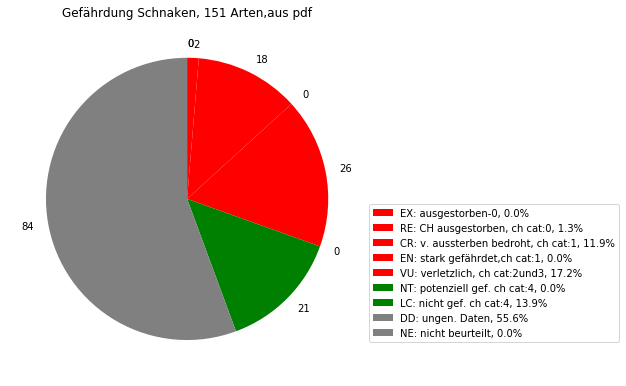

In [10]:
values = [0, 2, 18, 0, 26, 0, 21, 84, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben-0', 'RE: CH ausgestorben, ch cat:0',
    'CR: v. aussterben bedroht, ch cat:1', 'EN: stark gefährdet,ch cat:1', 
    'VU: verletzlich, ch cat:2und3',"NT: potenziell gef. ch cat:4",
    "LC: nicht gef. ch cat:4","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Schnaken, 151 Arten,aus pdf')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()